In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Load the data
df = pd.read_csv('sample_recs_data.csv')

In [28]:
# 1. Basic data exploration
print(df.describe())
print(df.info())

       Building_id        HDD65   TOTSQFT_EN    WINDOWS      BTUELCOL
count     10.00000    10.000000    10.000000  10.000000     10.000000
mean       5.50000  2987.100000  1552.000000   2.700000   8259.506000
std        3.02765  1209.948066  1216.623744   1.494434   7382.070587
min        1.00000   901.000000   590.000000   1.000000      0.000000
25%        3.25000  2022.250000   770.000000   1.250000   4413.737500
50%        5.50000  3457.000000   900.000000   2.500000   5213.565000
75%        7.75000  3837.750000  2100.000000   4.000000   9980.480000
max       10.00000  4233.000000  4520.000000   5.000000  24943.940000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Building_id  10 non-null     int64  
 1   state        10 non-null     object 
 2   HDD65        10 non-null     int64  
 3   TOTSQFT_EN   10 non-null     int64  
 4   WINDOWS     

In [29]:
# 2. Calculate average energy consumption per square foot
df['EnergyIntensity'] = df['BTUELCOL'] / df['TOTSQFT_EN']
print("Average Energy Intensity (BTU/sqft):", df['EnergyIntensity'].mean())

Average Energy Intensity (BTU/sqft): 5.421892333918706


In [30]:
# 3. Find the state with the highest average HDD65
state_hdd = df.groupby('state')['HDD65'].mean().sort_values(ascending=False)
print("State with highest average HDD65:", state_hdd.index[0])

State with highest average HDD65: DC


In [31]:
# 4. Correlation between HDD65 and energy consumption
correlation = df['HDD65'].corr(df['BTUELCOL'])
print(f"Correlation between HDD65 and energy consumption: {correlation:.2f}")

Correlation between HDD65 and energy consumption: -0.34


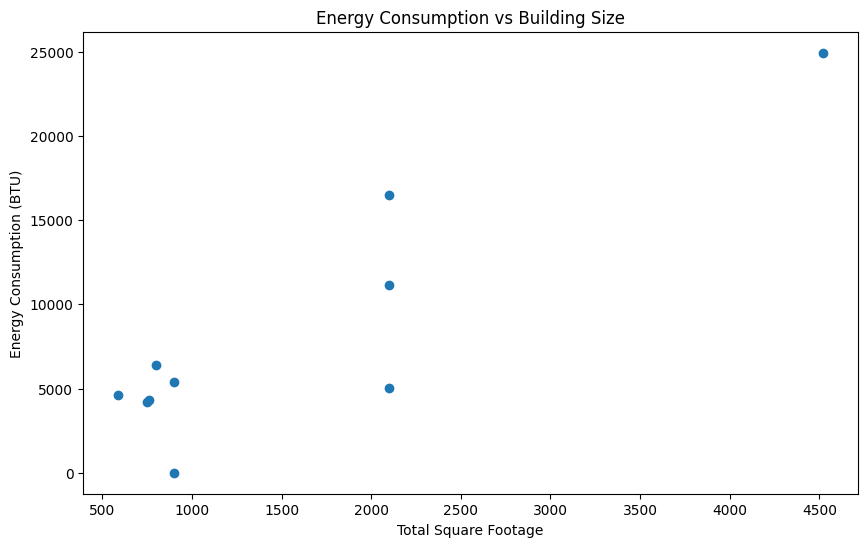

In [32]:
# 5. Visualize relationship between square footage and energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(df['TOTSQFT_EN'], df['BTUELCOL'])
plt.xlabel('Total Square Footage')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Energy Consumption vs Building Size')
plt.show()

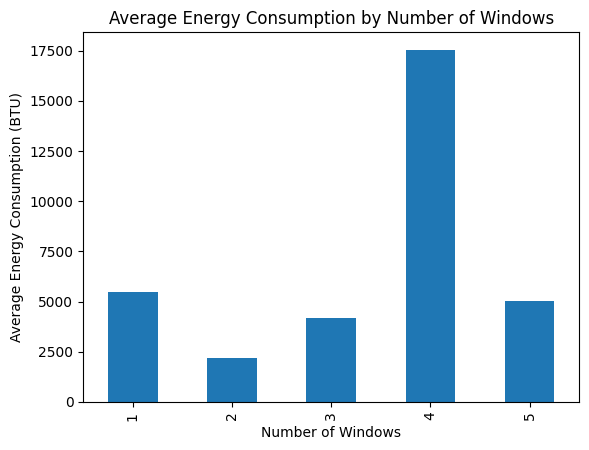

In [33]:
# 6. Compare average energy consumption for buildings with different numbers of windows
window_energy = df.groupby('WINDOWS')['BTUELCOL'].mean()
window_energy.plot(kind='bar')
plt.xlabel('Number of Windows')
plt.ylabel('Average Energy Consumption (BTU)')
plt.title('Average Energy Consumption by Number of Windows')
plt.show()

In [34]:
# 7. Find buildings with energy consumption above the 90th percentile
high_consumption = df[df['BTUELCOL'] > df['BTUELCOL'].quantile(0.9)]
print("Buildings with high energy consumption:")
print(high_consumption[['Building_id', 'state', 'BTUELCOL']])

Buildings with high energy consumption:
   Building_id state  BTUELCOL
5            6    TX  24943.94


In [35]:
# 8. Normalize energy consumption by HDD65
df['NormalizedEnergy'] = df['BTUELCOL'] / df['HDD65']
print("Top 3 most efficient buildings (normalized by HDD65):")
print(df.nsmallest(3, 'NormalizedEnergy')[['Building_id', 'state', 'NormalizedEnergy']])

Top 3 most efficient buildings (normalized by HDD65):
   Building_id state  NormalizedEnergy
7            8    MS          0.000000
8            9    DC          0.985353
1            2    AR          1.231986


In [36]:
# 9. Analyze energy intensity across states
df['EnergyIntensity'] = df['BTUELCOL'] / df['TOTSQFT_EN']
state_intensity = df.groupby('state')['EnergyIntensity'].mean().sort_values(ascending=False)
print("\nTop 3 states by average energy intensity:")
print(state_intensity.head(3))


Top 3 states by average energy intensity:
state
NJ    7.987225
AR    7.863831
OK    7.860829
Name: EnergyIntensity, dtype: float64


In [37]:
# 10. Multi-factor analysis: Energy consumption by state and size category
pivot_table = df.pivot_table(values='BTUELCOL', index='state', aggfunc='mean')
print("\nAverage energy consumption by state and size category:")
print(pivot_table)


Average energy consumption by state and size category:
        BTUELCOL
state           
AR      4639.660
AZ      4338.430
DC      4171.000
MS         0.000
NJ      6389.780
NM      8290.455
OK     16507.740
SC      5023.600
TX     24943.940


In [38]:
# 11. Identify potential outliers
Q1 = df['BTUELCOL'].quantile(0.25)
Q3 = df['BTUELCOL'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['BTUELCOL'] < (Q1 - 1.5 * IQR)) | (df['BTUELCOL'] > (Q3 + 1.5 * IQR))]
print("\nPotential outliers in energy consumption:")
print(outliers[['Building_id', 'state', 'BTUELCOL']])


Potential outliers in energy consumption:
   Building_id state  BTUELCOL
5            6    TX  24943.94
